# <h1 align="center">Project 2 - Analyzing Baseball Data </h1>

# Introduction

I start to anlyze the <b>Baseball Data</b> because i don't know too much things about baseball so i can learn new things with searching and reading about the game.Firstly, i read about the rules of the game and watch it several times, play from the smart-phone application and read the comments in statistical perspective so i think what should i search about in lots of data about baseball, i think about what sports i like which is football and basketball, and might be there any similarities within these sports and baseball? Finally, i realize and found 2 main question that makes me interested to analyze. The first question is,what is the Body Mass Index(BMI) of players who play this game, is Body Mass Index(BMI) effect on players' baseball career time(for this question i am using mostly the <u>MASTER table</u>). By the way the formula for BMI is  <i><u>((Weight in Pounds) / (Height in inches) x (Height in inches)) x 703</u></i> i will use this formula according to <a href="https://www.cdc.gov/nccdphp/dnpao/growthcharts/training/bmiage/page5_2.html">this link</a>. When I searching this question i am going to use bats and throws hands of players to group them and look at percantage of this when anylize. On the other hand my second question is, How players BMI changed over years and is this have an effect on players' career durations? Over the years BMI of players is increase or decrease?

<p>Before the start analysis i explain what is the Body Mass Index(BMI).BMI is an estimate of body fat and a good measure of people's risk for diseases that can occur with overweight and obesity. For adults, a healthy weight is defined as the appropriate body weight in relation to height. This ratio of weight to height is known as the body mass index (BMI) <a href="https://www.nhlbi.nih.gov/health/educational/lose_wt/bmitools.htm">source</a>.</p><br/>

According the caculations BMI categorized as below;
- Underweight =< 18.5 
- Normal weight = 18.5–24.9 
- Overweight = 25–29.9 
- Obesity = BMI of 30 or greater 

If a person BMI is greater than 30 he/she is assume obbese.

My hypothesises are players' BMI is effect their career durations that means players who BMI categorized as normal-weight have longer career than overweight and obbese players. And there is inverse proportionality between BMI and career duration of players. I wil look at this 2 hypothesis is true or not in this study.

# Analyse

I'll start with my first question that is 
<h3>"is body mass index(weight / (height x height) x 703.0) effect on players' baseball career duration??</h3><br/>
<p>In My opinion players' bmi is effected on players' careers. Therefore, Lets look at that is true or not.</p>  
Firstly, i import the necessery libraries then import <u>Master table</u> and create a Data Frame with that, then look at first 20 rows from that Data Frame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
master_df = pd.read_csv("Master.csv")
##.head(n) return how many rows what i want to look
master_df.head(20)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
5,abadfe01,1985.0,12.0,17.0,D.R.,La Romana,La Romana,NaN,NaN,NaN,...,Abad,Fernando Antonio,220.0,73.0,L,L,2010-07-28,2015-10-03,abadf001,abadfe01
6,abadijo01,1854.0,11.0,4.0,USA,PA,Philadelphia,1905.0,5.0,17.0,...,Abadie,John W.,192.0,72.0,R,R,1875-04-26,1875-06-10,abadj101,abadijo01
7,abbated01,1877.0,4.0,15.0,USA,PA,Latrobe,1957.0,1.0,6.0,...,Abbaticchio,Edward James,170.0,71.0,R,R,1897-09-04,1910-09-15,abbae101,abbated01
8,abbeybe01,1869.0,11.0,11.0,USA,VT,Essex,1962.0,6.0,11.0,...,Abbey,Bert Wood,175.0,71.0,R,R,1892-06-14,1896-09-23,abbeb101,abbeybe01
9,abbeych01,1866.0,10.0,14.0,USA,NE,Falls City,1926.0,4.0,27.0,...,Abbey,Charles S.,169.0,68.0,L,L,1893-08-16,1897-08-19,abbec101,abbeych01


- When i see columns i think index could be playerID that makes me easy to analyse later if i need to use specificly.

In [3]:
#.set_index(keys, inplace=True) this may help me to setting index playerID for this Data Frame
master_df.set_index("playerID", inplace=True)

In [4]:
master_df.head(20)

,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
abadfe01,1985.0,12.0,17.0,D.R.,La Romana,La Romana,NaN,NaN,NaN,NaN,...,Abad,Fernando Antonio,220.0,73.0,L,L,2010-07-28,2015-10-03,abadf001,abadfe01
abadijo01,1854.0,11.0,4.0,USA,PA,Philadelphia,1905.0,5.0,17.0,USA,...,Abadie,John W.,192.0,72.0,R,R,1875-04-26,1875-06-10,abadj101,abadijo01
abbated01,1877.0,4.0,15.0,USA,PA,Latrobe,1957.0,1.0,6.0,USA,...,Abbaticchio,Edward James,170.0,71.0,R,R,1897-09-04,1910-09-15,abbae101,abbated01
abbeybe01,1869.0,11.0,11.0,USA,VT,Essex,1962.0,6.0,11.0,USA,...,Abbey,Bert Wood,175.0,71.0,R,R,1892-06-14,1896-09-23,abbeb101,abbeybe01


- And now i looked at what i have got and see there are lots of columns so that i will look what columns i have and what is their data types 

In [5]:
#.columns can show columns as a list but since i need to their data types i use .dtypes that show meboth columns with their type   
print("----------------------------")
master_df.dtypes

----------------------------


birthYear       float64
birthMonth      float64
birthDay        float64
birthCountry     object
birthState       object
birthCity        object
deathYear       float64
deathMonth      float64
deathDay        float64
deathCountry     object
deathState       object
deathCity        object
nameFirst        object
nameLast         object
nameGiven        object
weight          float64
height          float64
bats             object
throws           object
debut            object
finalGame        object
retroID          object
bbrefID          object
dtype: object

In [6]:
#.loc helps me to return a new data frame with same index and columns what i want
master_df2 = master_df.loc[:,['nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame']]

- I listed below why i chose these columns and why;
    - nameGiven column choosen just see who the player is,
    - weight, height is necessery for to calculate BMI,
    - bats and throws hands may help me to group players,
    - debut and FinalGame is for to calculate career days of that player 

In [7]:
master_df2.head(25)

,nameGiven,weight,height,bats,throws,debut,finalGame
playerID,,,,,,,
aardsda01,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23
aaronha01,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03
aaronto01,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26
aasedo01,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03
abadan01,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13
abadfe01,Fernando Antonio,220.0,73.0,L,L,2010-07-28,2015-10-03
abadijo01,John W.,192.0,72.0,R,R,1875-04-26,1875-06-10
abbated01,Edward James,170.0,71.0,R,R,1897-09-04,1910-09-15
abbeybe01,Bert Wood,175.0,71.0,R,R,1892-06-14,1896-09-23


- I see there are NaN values for players so i delete those players from my dataframe and also check how many rows left.

In [8]:
#.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) dropna will help me to remove NaN values.
# To create new fresh dataframe is better because i may use old one later so i will not use inplace=True i let it False
cleaned_master_df = master_df2.dropna(how="any")
print("There are ",len(master_df2), " rows from begining")
print("-----------------------")
print("There are ",len(cleaned_master_df)," rows after cleaning")
print("-----------------------")
print(len(master_df2) - len(cleaned_master_df)," rows deleted with dropna function")

There are  18846  rows from begining
-----------------------
There are  17252  rows after cleaning
-----------------------
1594  rows deleted with dropna function


- Now time to calculate Body Mass Index(BMI) of each player formula was (weight / (height x height) x 703.0) <br/>
  Therefore, i write a function below that calculate BMI

In [9]:
def body_mass_index(data):
    w = data["weight"]
    h = data["height"]  
    return (w/(h*h))*703.0

- And then i will calculate all players BMI and create new column for that

In [10]:
# .apply(func, axis=0, broadcast=False, raw=False, reduce=None, args=(), **kwds) apply function will 
# help me to calculate BMI for each player(each row since each row represent one player) and then 
# i will assign them to bmi column

cleaned_master_df1 = cleaned_master_df.copy()
cleaned_master_df1["bmi"] = cleaned_master_df1.apply(body_mass_index, axis=1)
cleaned_master_df = cleaned_master_df1


In [11]:
cleaned_master_df.head(20)

,nameGiven,weight,height,bats,throws,debut,finalGame,bmi
playerID,,,,,,,,
aardsda01,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,27.495111
aaronha01,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,24.409722
aaronto01,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,23.745778
aasedo01,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,23.745778
abadan01,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,24.273222
abadfe01,Fernando Antonio,220.0,73.0,L,L,2010-07-28,2015-10-03,29.022331
abadijo01,John W.,192.0,72.0,R,R,1875-04-26,1875-06-10,26.037037
abbated01,Edward James,170.0,71.0,R,R,1897-09-04,1910-09-15,23.707598
abbeybe01,Bert Wood,175.0,71.0,R,R,1892-06-14,1896-09-23,24.404880


In [12]:
cleaned_master_df.dtypes

nameGiven     object
weight       float64
height       float64
bats          object
throws        object
debut         object
finalGame     object
bmi          float64
dtype: object

- Time to look at each players' career duration but as seen from above dtypes debut and finalGame is at object types so i convert it to datetime and after a quick search to_datetime builtin function is do that job and i apply this function for each column debut and finalGame

In [13]:
cleaned_master_df['debut'] = cleaned_master_df['debut'].apply(pd.to_datetime)
cleaned_master_df['finalGame'] = cleaned_master_df['finalGame'].apply(pd.to_datetime)
print(cleaned_master_df.dtypes)

nameGiven            object
weight              float64
height              float64
bats                 object
throws               object
debut        datetime64[ns]
finalGame    datetime64[ns]
bmi                 float64
dtype: object


- After the convert objects to datetime, i calculate the career duration from finalGame date to debut(first game) date and assign it a new column that named "careerDays"

In [14]:
cleaned_master_df["careerDays"] = cleaned_master_df.finalGame - cleaned_master_df.debut
cleaned_master_df.head(20)

,nameGiven,weight,height,bats,throws,debut,finalGame,bmi,careerDays
playerID,,,,,,,,,
aardsda01,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,27.495111,4156 days
aaronha01,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,24.409722,8209 days
aaronto01,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,23.745778,3456 days
aasedo01,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,23.745778,4817 days
abadan01,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,24.273222,1676 days
abadfe01,Fernando Antonio,220.0,73.0,L,L,2010-07-28,2015-10-03,29.022331,1893 days
abadijo01,John W.,192.0,72.0,R,R,1875-04-26,1875-06-10,26.037037,45 days
abbated01,Edward James,170.0,71.0,R,R,1897-09-04,1910-09-15,23.707598,4758 days
abbeybe01,Bert Wood,175.0,71.0,R,R,1892-06-14,1896-09-23,24.404880,1562 days


- There are players who careers' duration so low for example "34 days" played Leander Franklin or Ody Cleon who played "35 days", so i will consider players who play more than 365 days(1 year)

In [15]:

filtered_players = cleaned_master_df[cleaned_master_df["careerDays"] > "365 days"]
print("There are ",len(cleaned_master_df), " players from filtered")
print("-----------------------")
print("There are ",len(filtered_players)," players after filtered")
print("-----------------------")
print(len(cleaned_master_df) - len(filtered_players)," players filtered who play less 365 days")

There are  17252  players from filtered
-----------------------
There are  12434  players after filtered
-----------------------
4818  players filtered who play less 365 days


- And time to see general information about my filtered players

In [16]:
filtered_players.describe()

,weight,height,bmi,careerDays
count,12434.000000,12434.000000,12434.000000,12434
mean,187.839714,72.464372,25.106399,2560 days 13:22:34.415312
std,21.136227,2.520897,2.069728,1743 days 13:34:27.664478
min,120.000000,63.000000,17.718967,366 days 00:00:00
25%,175.000000,71.000000,23.731674,1119 days 06:00:00
50%,185.000000,72.000000,25.033784,2213 days 00:00:00
75%,200.000000,74.000000,26.245333,3683 days 18:00:00
max,305.000000,83.000000,39.745090,12862 days 00:00:00


- careerDays are seeing not well with describe function that means when subtract 2 datetime result is datetime too but i need it as number so i will convert to that float.

In [17]:
filtered_players1 = filtered_players.copy()
filtered_players1.loc[:,"careerDays"] = (pd.to_timedelta(filtered_players1.careerDays,unit='d')+pd.to_timedelta(1,unit='s')).astype('timedelta64[D]')
filtered_players = filtered_players1

In [18]:
filtered_players.head(20)


,nameGiven,weight,height,bats,throws,debut,finalGame,bmi,careerDays
playerID,,,,,,,,,
aardsda01,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,27.495111,4156.0
aaronha01,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,24.409722,8209.0
aaronto01,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,23.745778,3456.0
aasedo01,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,23.745778,4817.0
abadan01,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,24.273222,1676.0
abadfe01,Fernando Antonio,220.0,73.0,L,L,2010-07-28,2015-10-03,29.022331,1893.0
abbated01,Edward James,170.0,71.0,R,R,1897-09-04,1910-09-15,23.707598,4758.0
abbeybe01,Bert Wood,175.0,71.0,R,R,1892-06-14,1896-09-23,24.404880,1562.0
abbeych01,Charles S.,169.0,68.0,L,L,1893-08-16,1897-08-19,25.693555,1464.0


- And fimally this is statistic of my data set

In [19]:
filtered_players.describe()

,weight,height,bmi,careerDays
count,12434.000000,12434.000000,12434.000000,12434.000000
mean,187.839714,72.464372,25.106399,2560.557343
std,21.136227,2.520897,2.069728,1743.565598
min,120.000000,63.000000,17.718967,366.000000
25%,175.000000,71.000000,23.731674,1119.250000
50%,185.000000,72.000000,25.033784,2213.000000
75%,200.000000,74.000000,26.245333,3683.750000
max,305.000000,83.000000,39.745090,12862.000000


In [20]:
print("-The weightest player is {}, with {} weight".format(filtered_players.loc[filtered_players["weight"].idxmax(axis=0),
                                                                               "nameGiven"],
                                                          filtered_players.loc[filtered_players["weight"].idxmax(axis=0),
                                                                              "weight"]))
print("-The heightest player is {}, with {} height".format(filtered_players.loc[filtered_players["height"].idxmax(axis=0),
                                                                              "nameGiven"],
                                                          filtered_players.loc[filtered_players["height"].idxmax(axis=0),
                                                                              "height"]))
print("-The player has highest bmi is {}, with {} bmi".format(filtered_players.loc[filtered_players["bmi"].idxmax(axis=0),
                                                                              "nameGiven"],
                                                             filtered_players.loc[filtered_players["bmi"].idxmax(axis=0),
                                                                              "bmi"]))
print("-The player has highest career days is {}, with {} days".format(filtered_players.loc[filtered_players["careerDays"].idxmax(axis=0),
                                                                              "nameGiven"],
                                                             filtered_players.loc[filtered_players["careerDays"].idxmax(axis=0),
                                                                              "careerDays"]))

-The weightest player is Jonathan Roy, with 305.0 weight
-The heightest player is Jon Erich, with 83.0 height
-The player has highest bmi is Bartolo, with 39.74509025986907 bmi
-The player has highest career days is Nicholas, with 12862.0 days


- This time i will group my data  terms of throws and bats hands because this is the primary paramater for players when playing a the game

In [21]:
#.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs) this function helps me
# grouping my filtered data and then i get the mean of grouped data and assign it new dataframe
grouped_filtered_player = filtered_players.groupby(['bats','throws'])
grouped_filtered_player_by_mean= filtered_players.groupby(['bats','throws']).mean()

In [22]:
grouped_filtered_player_by_mean

weight     height        bmi   careerDays
bats throws                                               
B    L       183.516129  71.935484  24.907861  2893.620968
     R       182.070055  71.611264  24.928892  2776.303571
L    L       188.089928  72.665982  25.002304  2532.807297
     R       185.437086  71.954305  25.138916  2682.698013
R    L       188.396325  72.837270  24.927347  2499.937008
     R       188.829438  72.583473  25.154886  2521.087024

In [23]:
#.unstack(level=-1, fill_value=None)[source] function helps me reshape the grouped data
grouped_filtered_player_by_mean.unstack()

weight                 height                   bmi             \
throws           L           R          L          R          L          R   
bats                                                                         
B       183.516129  182.070055  71.935484  71.611264  24.907861  24.928892   
L       188.089928  185.437086  72.665982  71.954305  25.002304  25.138916   
R       188.396325  188.829438  72.837270  72.583473  24.927347  25.154886   

         careerDays               
throws            L            R  
bats                              
B       2893.620968  2776.303571  
L       2532.807297  2682.698013  
R       2499.937008  2521.087024

<p align="center"><b><u>As a result until now this tables easly show players' career who use both hand at bats is longer than other. </u></b></p>

In [24]:
#this function categorize the player according to his BMI
def categorize_bmi(bmi1):
    bmi = bmi1["bmi"]
    if bmi <= 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal Weight"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obesity"

In [25]:
categorize_bmi_filtered_players = filtered_players.copy()
categorize_bmi_filtered_players["categorized_bmi"] = categorize_bmi_filtered_players.apply(categorize_bmi, axis=1)

In [26]:
categorize_bmi_filtered_players.head(20)

,nameGiven,weight,height,bats,throws,debut,finalGame,bmi,careerDays,categorized_bmi
playerID,,,,,,,,,,
aardsda01,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,27.495111,4156.0,Overweight
aaronha01,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,24.409722,8209.0,Normal Weight
aaronto01,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,23.745778,3456.0,Normal Weight
aasedo01,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,23.745778,4817.0,Normal Weight
abadan01,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,24.273222,1676.0,Normal Weight
abadfe01,Fernando Antonio,220.0,73.0,L,L,2010-07-28,2015-10-03,29.022331,1893.0,Overweight
abbated01,Edward James,170.0,71.0,R,R,1897-09-04,1910-09-15,23.707598,4758.0,Normal Weight
abbeybe01,Bert Wood,175.0,71.0,R,R,1892-06-14,1896-09-23,24.404880,1562.0,Normal Weight
abbeych01,Charles S.,169.0,68.0,L,L,1893-08-16,1897-08-19,25.693555,1464.0,Overweight


In [27]:
#grouped_filtered_player_by_bats_hand = filtered_players.groupby('bats').throws.value_counts().sort_index()
#grouped_filtered_player_by_bats_hand.plot.pie(subplots=True,figsize=(8, 8),autopct='%.2f', fontsize=20,legend=True,title ="Figure 3 : Hand Percantege of Players")
grouped_categorized = categorize_bmi_filtered_players.groupby('categorized_bmi')
#grouped_categorized.plot.pie(subplots=True,figsize=(8, 8),autopct='%.2f', fontsize=20,legend=True,title ="Figure 3 : Hand Percantege of Players")



In [28]:
grouped_categorized.describe()


bmi    careerDays       height       weight
categorized_bmi                                                           
Normal Weight   count  6181.000000   6181.000000  6181.000000  6181.000000
                mean     23.535136   2609.698269    72.435690   175.873969
                std       0.984526   1784.609468     2.477722    14.277944
                min      18.792604    366.000000    63.000000   120.000000
                25%      23.010315   1119.000000    71.000000   165.000000
                50%      23.731674   2235.000000    72.000000   175.000000
                75%      24.389796   3750.000000    74.000000   185.000000
                max      24.995556  10678.000000    82.000000   235.000000
Obesity         count   284.000000    284.000000   284.000000   284.000000
                mean     31.565439   2479.038732    73.235915   241.112676
                std       1.492667   1717.146716     2.582349    20.182418
                min      30.017906    379.000000    66.000000   186.000000
                25%      30.619556   1109.000000    71.000000   225.000000
                50%      31.036184   2088.500000    73.000000   240.000000
                75%      32.140594   3701.750000    75.000000   250.000000
                max      39.745090   9647.000000    81.000000   305.000000
Overweight      count  5967.000000   5967.000000  5967.000000  5967.000000
                mean     26.428948   2512.407743    72.458522   197.720965
                std       1.227902   1697.695353     2.556288    17.831880
                min      25.014922    366.000000    63.000000   150.000000
                25%      25.544844   1120.000000    71.000000   185.000000
                50%      26.167763   2204.000000    72.000000   195.000000
                75%      27.121914   3655.000000    74.000000   210.000000
                max      29.994667  12862.000000    83.000000   290.000000
Underweight     count     2.000000      2.000000     2.000000     2.000000
                mean     18.088112   5920.500000    69.000000   122.500000
                std       0.522050   5623.620231     0.000000     3.535534
                min      17.718967   1944.000000    69.000000   120.000000
                25%      17.903539   3932.250000    69.000000   121.250000
                50%      18.088112   5920.500000    69.000000   122.500000
                75%      18.272684   7908.750000    69.000000   123.750000
                max      18.457257   9897.000000    69.000000   125.000000

In [29]:
grouped_categorized = categorize_bmi_filtered_players.groupby('categorized_bmi').mean()

In [30]:
grouped_categorized

,weight,height,bmi,careerDays
categorized_bmi,,,,
Normal Weight,175.873969,72.435690,23.535136,2609.698269
Obesity,241.112676,73.235915,31.565439,2479.038732
Overweight,197.720965,72.458522,26.428948,2512.407743
Underweight,122.500000,69.000000,18.088112,5920.500000


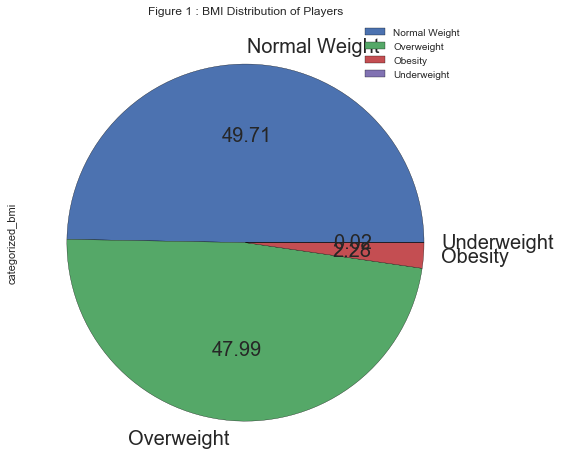

In [31]:
categorize_bmi_filtered_players.categorized_bmi.value_counts().plot(kind='pie',figsize=(8, 8),autopct='%.2f', fontsize=20,legend=True,title ="Figure 1 : BMI Distribution of Players")

- Above the pie shows that percentage of BMI Distribution in players. Also Above the table that shows the 2 player just underweight and 284 players are obbese  in this dataset.In addition, Below the bar shows that players' career duration is not different comparing to each other.

- Since there is only 2 player in underweight i will delete them from the data set because it will effect the charts negatively.

In [32]:
categorize_bmi_filtered_players = categorize_bmi_filtered_players[categorize_bmi_filtered_players.categorized_bmi != "Underweight"]

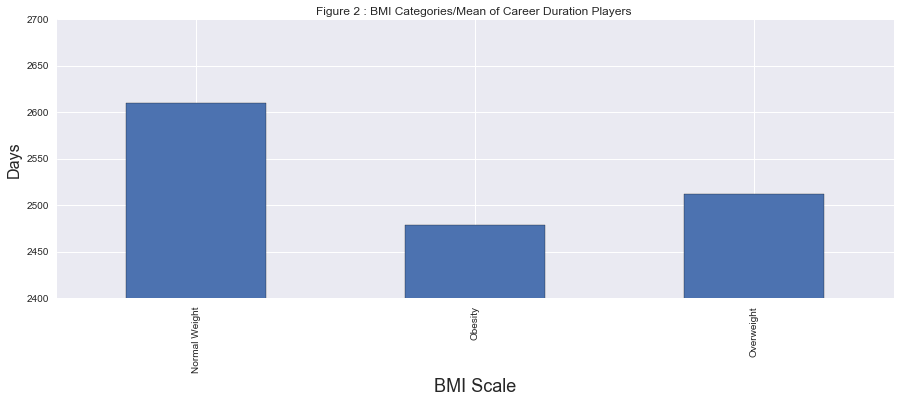

In [33]:
categorize_bmi_filtered_players.groupby('categorized_bmi').careerDays.mean().plot(kind='bar',figsize=(15, 5),ylim=(2400,2700), title="Figure 2 : BMI Categories/Mean of Career Duration Players ")
plt.xlabel('BMI Scale', fontsize=18)
plt.ylabel('Days', fontsize=16)

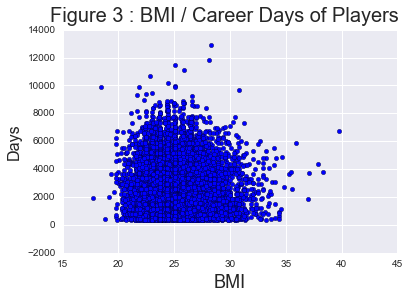

In [34]:
fig = plt.figure()
plt.scatter(filtered_players.bmi, filtered_players.careerDays, s=20)
fig.suptitle('Figure 3 : BMI / Career Days of Players', fontsize=20)
plt.xlabel('BMI', fontsize=18)
plt.ylabel('Days', fontsize=16)

<b>Above the scatter also shows players' career who is over 30 BMI is not more than 6000 days. Therefore we can say that players should be carefull about their BMI.</b>

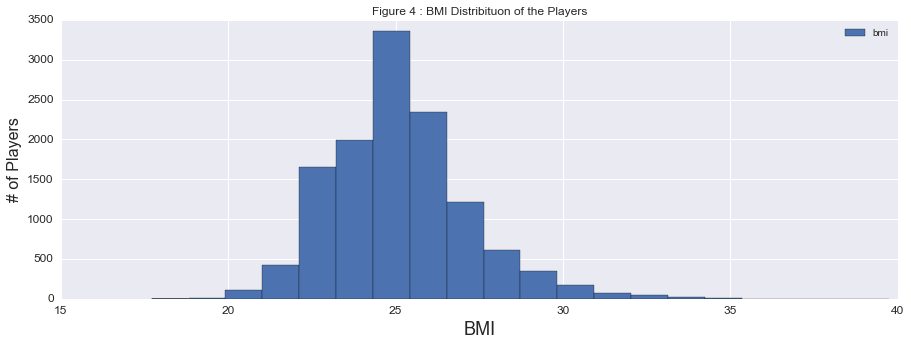

In [35]:
filtered_players.plot('careerDays', 'bmi',kind='hist',title ="Figure 4 : BMI Distribituon of the Players", figsize=(15, 5),bins=20, legend=True, fontsize=12)
plt.xlabel('BMI', fontsize=18)
plt.ylabel('# of Players', fontsize=16)

<b>Above the histogram shows players' BMI distribution. We can say that more than 3000 players' BMI around 25. Also we can say that half of the players' BMI between 24-26</b>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB1C682E10>], dtype=object)

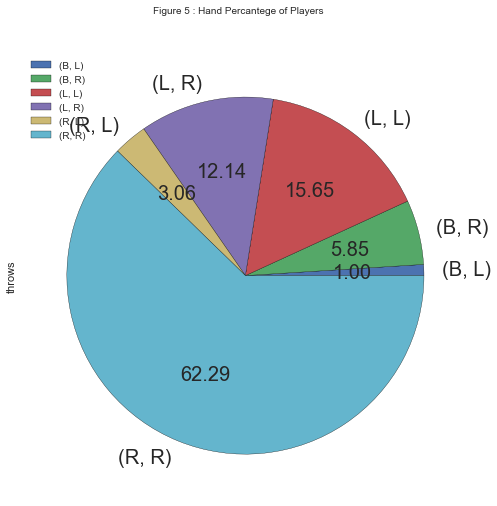

In [36]:
grouped_filtered_player_by_bats_hand = filtered_players.groupby('bats').throws.value_counts().sort_index()
grouped_filtered_player_by_bats_hand.plot.pie(subplots=True,figsize=(8, 8),autopct='%.2f', fontsize=20,legend=True,title ="Figure 5 : Hand Percantege of Players")

<b>Above the pie chart shows players' hands at bats(B = Both, R=Right, L=Left) and throws(R=Right, L=Left). First element at tuple represent bats hand of plaers and secon elements represent throws hand. We can say aruont 65% of players use Right hands, near 28% of players use left hand near 7% can use both hands for bats, On the other Hand near 80% of players use right hand, and near 20% of players use left hand for throws the ball</b>

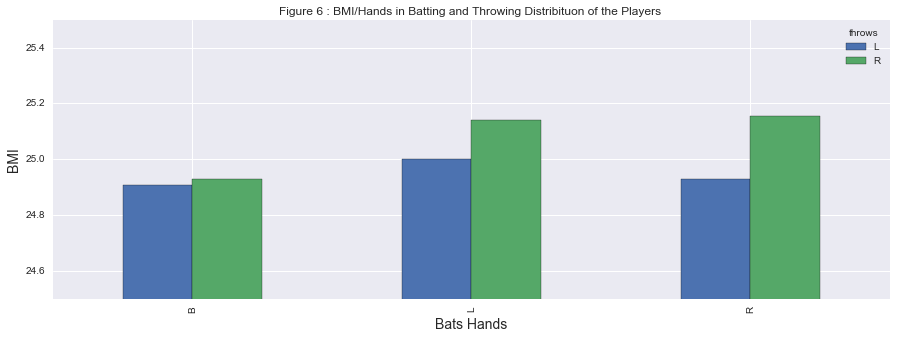

In [37]:

grouped_filtered_player_by_mean["bmi"].unstack(level=1).plot(kind='bar',  figsize=(15, 5),ylim=(24.5,25.5),title="Figure 6 : BMI/Hands in Batting and Throwing Distribituon of the Players ")
plt.xlabel('Bats Hands', fontsize=14)
plt.ylabel('BMI', fontsize=14)

<b>As show above the chart players' use hand doesn't much effected on BMI </b>

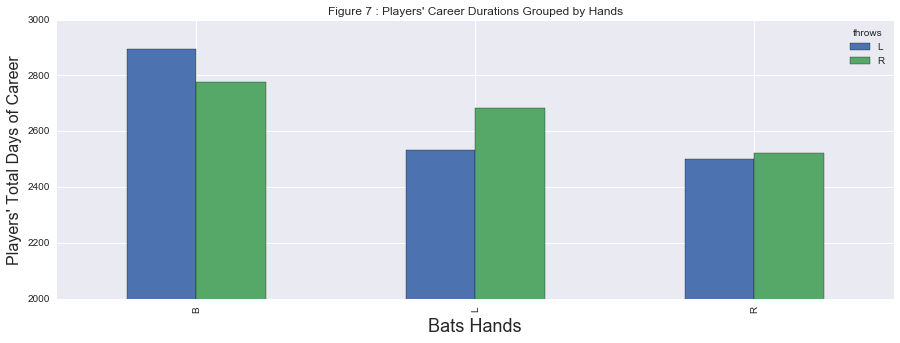

In [38]:
fig = plt.figure()
grouped_filtered_player_by_mean["careerDays"].unstack(level=1).plot(kind='bar',  figsize=(15, 5),ylim=(2000,3000),title="Figure 7 : Players' Career Durations Grouped by Hands")
plt.xlabel('Bats Hands', fontsize=18)
plt.ylabel("Players' Total Days of Career", fontsize=16)

<b>As we can see from the bar chart people who use both hands for Bats has longer career avarage than others and it also show that for the Throws hand, the avarage is more  for the left hand player than right hand players on the players who use both hand for Bats. This was interesting because avarage of players' career is more for the right hand players than left hand players' on throws hand. </b>

<center>Time to my second question,</center> 
<h3>How players BMI changed over years and is this have an effect on players' career durations? Over the years BMI of players is increase or decrease? </h3>

- First of all i need the years, For this information i use the minimum value of debut column's year information that shows when was the first player enter the game and maximum value of finalGame column's year information that shows when was the last player exit the game. I use this information from because i don't know when the game start and finish these information could give me at least scope of the my data. Therefore, i took min values and max values of my filtered_players.- 

In [39]:
#i took minumum of debut column with .min() and maximum of finalGame column with max()
minData = filtered_players[:"debut"].min()
maxData = filtered_players[:"finalGame"].max()
print(minData, maxData)

nameGiven             Aaron James
weight                        120
height                         63
bats                            B
throws                          L
debut         1871-05-04 00:00:00
finalGame     1875-08-26 00:00:00
bmi                        17.719
careerDays                    366
dtype: object nameGiven            Zoilo Manuel
weight                        305
height                         81
bats                            R
throws                          R
debut         2014-09-17 00:00:00
finalGame     2015-10-04 00:00:00
bmi                       39.7451
careerDays                  12862
dtype: object


In [40]:
#dates come to me datetime but i need just years so i took the every year to a list with 5 more empty column
YearList = []
for a in range(minData["debut"].year,maxData["finalGame"].year+1):
    minList = [a,"","","","",""]
    YearList.append(minList)

- I took years with 5 more emty columns the reason i did this i will insert the mean of weight,height,bmi,careerDays and count of player who play that year.I put the weight and height because these 2 is variable for bmi. However count of player also effect on bmi because avarage of weight and height related to count of player in that year. In addition, i will also take mean of careerDays because i will check is BMI related on career duration of players so i will take careerDays of players.
Below there are first 5 data in list.

In [41]:
YearList[0:5]

[[1871, '', '', '', '', ''],
 [1872, '', '', '', '', ''],
 [1873, '', '', '', '', ''],
 [1874, '', '', '', '', ''],
 [1875, '', '', '', '', '']]

In [42]:
#new data frame from YearList
means_by_year = pd.DataFrame(YearList,columns=["Year","weight","height","bmi","careerDays","CountPlayers"])

- In below function, i am writing a function to calculate mean of informations that i want from players by year that from in YearList list.The function slice players according to a year from YearList is between players' debut and finalGame if that so i assume those players played in that years after slicing them and take the mean for each year with count of player in that year.   

In [43]:
def find_avarages(data):
    filtered_players_rows = filtered_players[(filtered_players.debut.dt.year <= data.Year) 
                                             & (filtered_players.finalGame.dt.year >= data.Year)]
    ln = len(filtered_players_rows)
    filtered_players_rows = filtered_players_rows.mean()
    filtered_players_rows["CountPlayers"] = ln
    filtered_players_rows["Year"] = data.Year  
    return filtered_players_rows

In [44]:
print(filtered_players.dtypes)
print(means_by_year.dtypes)

nameGiven             object
weight               float64
height               float64
bats                  object
throws                object
debut         datetime64[ns]
finalGame     datetime64[ns]
bmi                  float64
careerDays           float64
dtype: object
Year             int64
weight          object
height          object
bmi             object
careerDays      object
CountPlayers    object
dtype: object


- With apply function i calculate and assign each years' means

In [45]:
means_by_year1 = means_by_year.copy()
means_by_year1 = means_by_year1.apply(find_avarages, axis=1)
means_by_year = means_by_year1

In [46]:
means_by_year.head(20)

,weight,height,bmi,careerDays,CountPlayers,Year
0,159.534884,68.441860,23.925085,3881.139535,43.0,1871.0
1,161.649123,68.666667,24.090728,4007.894737,57.0,1872.0
2,161.718750,68.828125,23.990250,3973.640625,64.0,1873.0
3,162.119403,68.761194,24.098962,4001.731343,67.0,1874.0
4,163.123596,68.786517,24.221336,3909.123596,89.0,1875.0
5,163.786517,68.853933,24.268054,4021.943820,89.0,1876.0
6,164.461538,68.879121,24.353353,4098.637363,91.0,1877.0
7,166.505376,68.903226,24.627808,4310.591398,93.0,1878.0
8,167.361345,68.991597,24.679197,4086.647059,119.0,1879.0
9,167.902778,69.125000,24.660481,4097.375000,144.0,1880.0


- I am now putting the years to index because it will be helpfull when visualize for x-asis and compare changes over years  

In [47]:
#.set_index(keys, inplace=True) this may help me to setting index Year for this Data Frame
means_by_year.set_index("Year", inplace=True)

In [48]:
means_by_year.head(20)

,weight,height,bmi,careerDays,CountPlayers
Year,,,,,
1871.0,159.534884,68.441860,23.925085,3881.139535,43.0
1872.0,161.649123,68.666667,24.090728,4007.894737,57.0
1873.0,161.718750,68.828125,23.990250,3973.640625,64.0
1874.0,162.119403,68.761194,24.098962,4001.731343,67.0
1875.0,163.123596,68.786517,24.221336,3909.123596,89.0
1876.0,163.786517,68.853933,24.268054,4021.943820,89.0
1877.0,164.461538,68.879121,24.353353,4098.637363,91.0
1878.0,166.505376,68.903226,24.627808,4310.591398,93.0
1879.0,167.361345,68.991597,24.679197,4086.647059,119.0


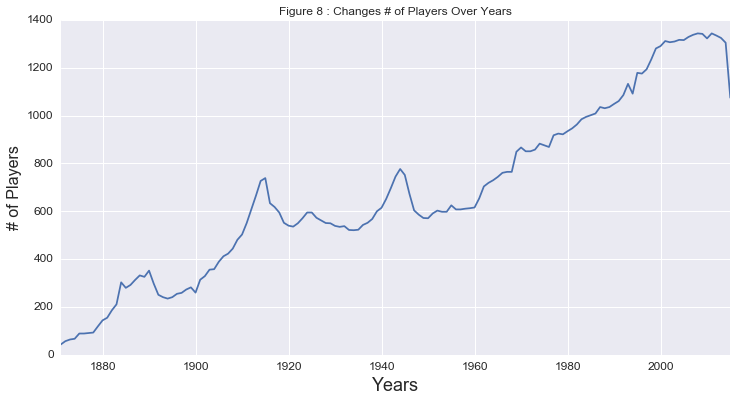

In [49]:
means_by_year['CountPlayers'].plot(figsize=(12, 6),sharex=False, fontsize=12 ,title ="Figure 8 : Changes # of Players Over Years")
plt.xlabel('Years', fontsize=18)
plt.ylabel("# of Players", fontsize=16)

<b>As shown above, Except the between 1920s and 1940s number of players in game is icreasing over years. This is important, all other things can be effected from the number of players because when calculating the means increasing the number of players will effect decrease effect of the mean since it is in divided part of the equation.  </b>

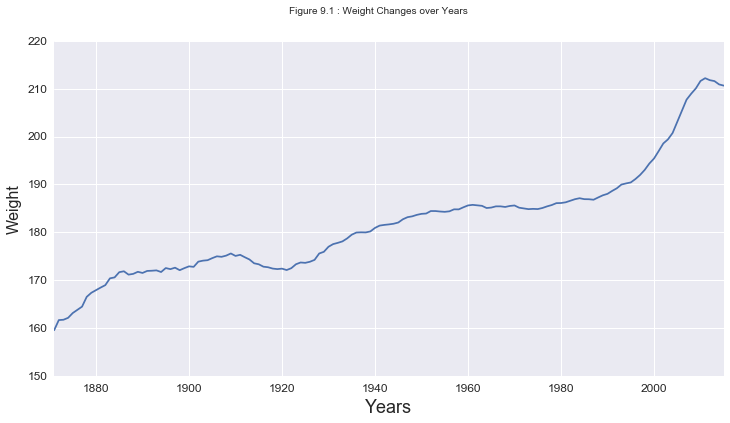

In [50]:
means_by_year['weight'].plot(subplots=True,figsize=(12, 6),sharex=False, fontsize=12 ,title ="Figure 9.1 : Weight Changes over Years")
plt.xlabel('Years', fontsize=18)
plt.ylabel("Weight", fontsize=16)

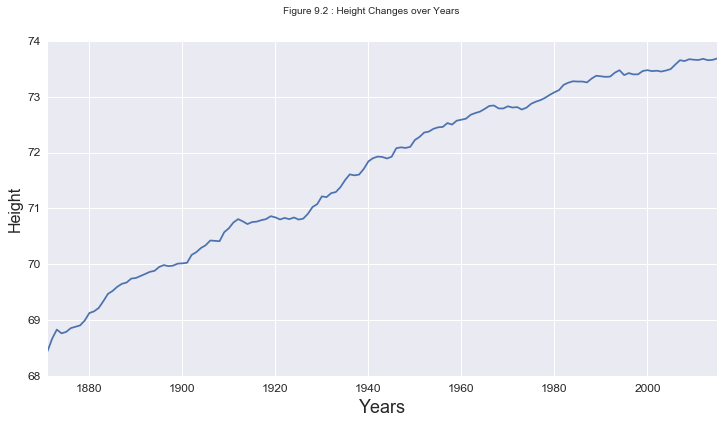

In [51]:
means_by_year["height"].plot(subplots=True,figsize=(12, 6),sharex=False, fontsize=12 ,title ="Figure 9.2 : Height Changes over Years")
plt.xlabel('Years', fontsize=18)
plt.ylabel("Height", fontsize=16)

<b>As seen from the above 2 graphics over the years players' weight and height avarege is increased despite of the number of players.Avarege of the weights is increased much more from 1990s until 2014/2015 opposite of the below of 1990s and Avarege of height have been increased always but after 2000s it is in same lavel. However we can say that teams use strong and tall players in games over years.</b>  

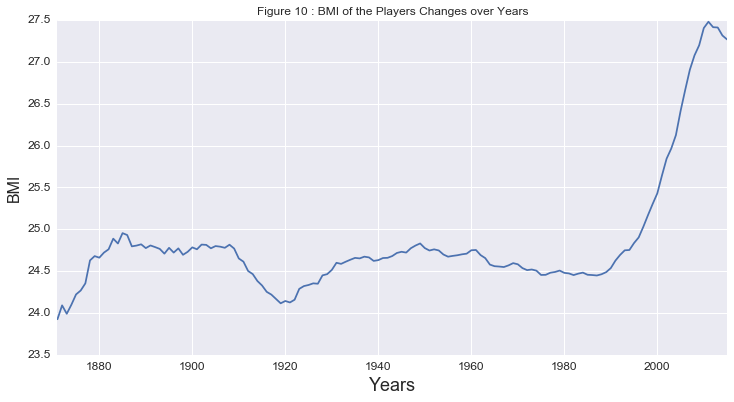

In [52]:
means_by_year['bmi'].plot(figsize=(12, 6),sharex=False, fontsize=12 ,title ="Figure 10 : BMI of the Players Changes over Years")
plt.xlabel('Years', fontsize=18)
plt.ylabel("BMI", fontsize=16)

<b>Above the line is really interesting until 1990s avarage of BMI not over 25 but after the 1990s it has been increased spectacular but there must be something for the reason of that. The reason may be increase from player's weight over years. As i show below the table in 1986 mean of players' weight is 187 and mean of height is 73.27 but in 2011 mean of players' weight is 212 and mean of height is 73.65. That means avarege of players weight is increased near 13% from 1986 to 2011. Since, The mean of height is not change so much(if it is increase bmi will decrease according to formula) BMI changed %12 in these years. </b> 

In [53]:
#.tail() helps me to see last rows that how many i want, it is opposite to .head() functon
means_by_year.tail(30)

,weight,height,bmi,careerDays,CountPlayers
Year,,,,,
1986.0,186.915758,73.273538,24.452847,3859.359762,1009.0
1987.0,186.813707,73.257722,24.447568,3797.057915,1036.0
1988.0,187.290980,73.325897,24.462273,3797.664403,1031.0
1989.0,187.740347,73.377413,24.487400,3812.667954,1036.0
1990.0,188.044805,73.367969,24.535974,3817.664442,1049.0
1991.0,188.654100,73.357210,24.625551,3830.436381,1061.0
1992.0,189.202578,73.362799,24.693291,3825.113260,1086.0
1993.0,189.989409,73.432480,24.748350,3759.128861,1133.0
1994.0,190.227106,73.476190,24.752109,3821.054029,1092.0


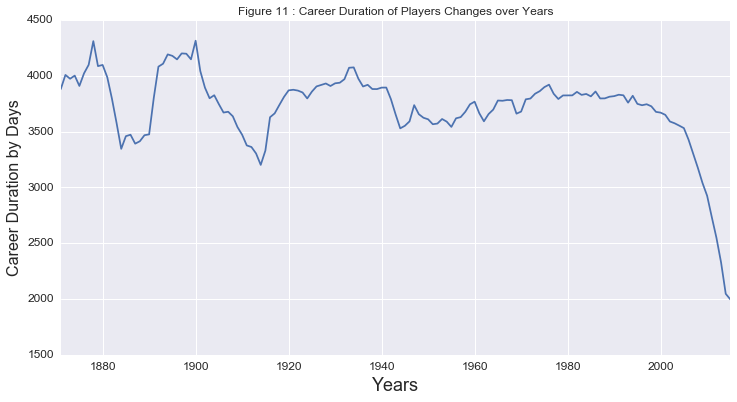

In [54]:
means_by_year['careerDays'].plot(figsize=(12, 6),sharex=False, fontsize=12 ,title ="Figure 11 : Career Duration of Players Changes over Years")
plt.xlabel('Years', fontsize=18)
plt.ylabel("Career Duration by Days", fontsize=16)

<b>Figure 11 shows that after 1990s career duration of players dramatically decrease. It is opposite in Figure 10 the BMI graphics, so we can't say that BMI is the only reason for that but we can certainly say BMI might be one of the reason that effects on players' career duration. </b>

# CONCLUSION

- The 49.72% of players are in Normal Weight(6181 players), 48% of players in Overweight(5967 players), 2.28% players in Obesity(284) and 0.02% is in Underweight(2 players)   according to BMI scale out of 12434 players as shown in Figure 1. According to Figure 2 in players who is Normal Weight career have near 1000 days difference with overweight players and near 1500 days difference with Obesity players. Therefore we can easily say that players who is Normal weight have longer career. In addition, Players’ career who have 30 and more BMI not over 6000 days and the intensity of BMI in players is near 25 as shown in Figure 3, Figure 4. Another point for players is their hand when they use at  batting and throwing. Figure 5 shows that 62.29 players use right hand both for batting and throwing and their BMI is the highest avarage despites of others situaton but there is not  much difference between bmi in hands kind. However when we look at the players career duration in Figure 7 players who use right hands in batting and throwing have shorter career and that is give opinnion players who use right hand has more BMI and shorter career and on the hand players who use both hands has lowest BMI average and longer career average. That is show that there might be inversely proportional between players’ BMI and career. Therefore looking at changes in BMI averages and career duration of players over years might give better opinion. 
- First of all i am going to show number of players each year and how it is changed until today. Except the 1915s and 1942s number of players increased but mostly the number of players changably but much more increase and sometimes decrease. İn Figure 9.2 players height mean accurately increase it is 69 in 1880 and over 73 in 1980s then it is not change so much until today but on the other hand players’ weight average is increase dramticly from 185 to 210 between 1980s and 2010s. This also increase the BMI of players in same years too it increased dramaticly from 24.5 to 27.5 as shown in Figure 10 and oposite of that Figure 11 shows the dicrease from 3500 to 2000 days in avarage of players’ career duration between those years. 
- Answering to my hypothesises, when comparing the Figure 10 and Figure 11 we can see the BMI and avarage of players' career duration has mostly inverse proportion when BMI is increase players' mean of career duration decrease espicially after 1990s average before that years it also shows the nearly same behaviors and as we can see from Figure 2 normal weight players have longer career than overweight and obesity players also 2 players who is underweight has longest career than other.